In [1]:
import sys
print(sys.version)

# we are using python version 3.12.2


3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]


In [2]:
# downloading all libraries and dependencies -- use pip if not present

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



## Examining Data for the last 24 hrs

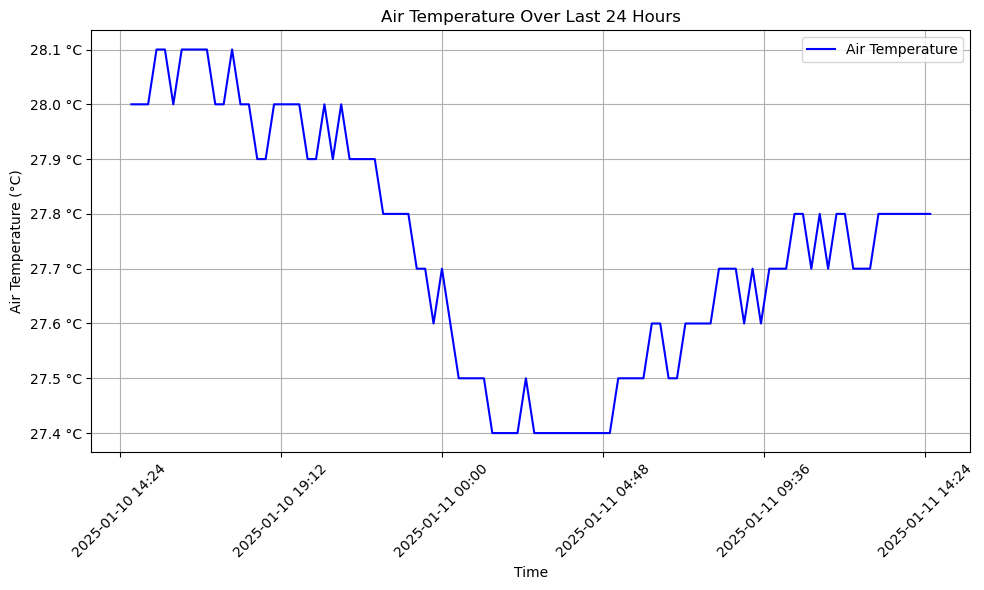

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

air_temperature_data = pd.read_csv("Datasets_24hrs/Air Temperature-data-2025-01-11 14_32_34.csv")

air_temperature_data['Time'] = pd.to_datetime(air_temperature_data['Time'])

air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temperature_data[
    'MwxStbdAirTemp stbd_mast_vaisala'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    air_temperature_data['Time'],
    air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'],
    label='Air Temperature',
    color='blue'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


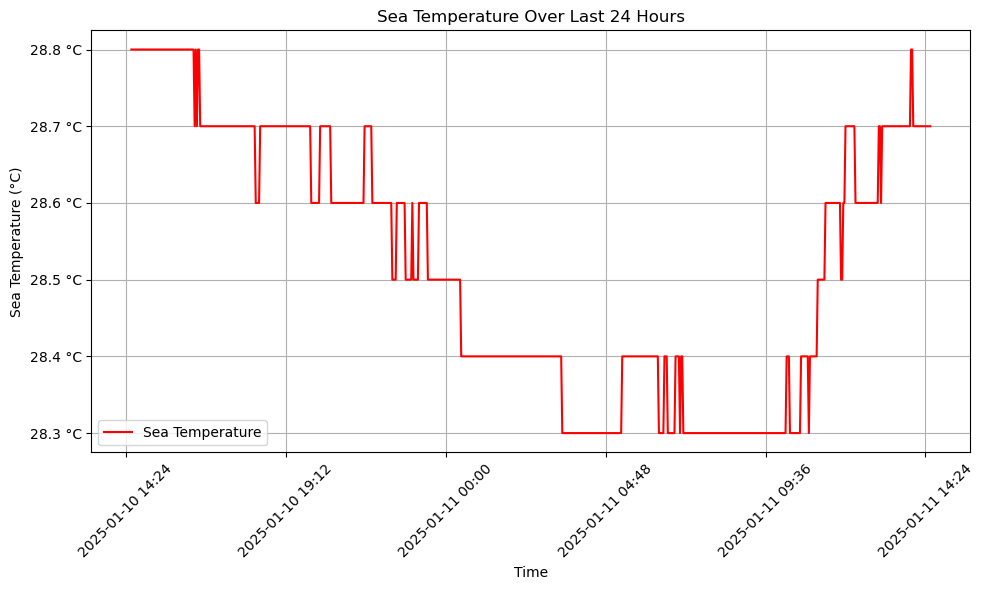

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

sea_temperature_data = pd.read_csv("Datasets_24hrs/Sea Temperature-data-2025-01-11 14_32_52.csv")

sea_temperature_data['Time'] = pd.to_datetime(sea_temperature_data['Time'])

sea_temperature_data['Temp bow_sbe45_tsg'] = sea_temperature_data[
    'Temp bow_sbe45_tsg'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    sea_temperature_data['Time'],
    sea_temperature_data['Temp bow_sbe45_tsg'],
    label='Sea Temperature',
    color='red'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Sea Temperature (°C)')
plt.title('Sea Temperature Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


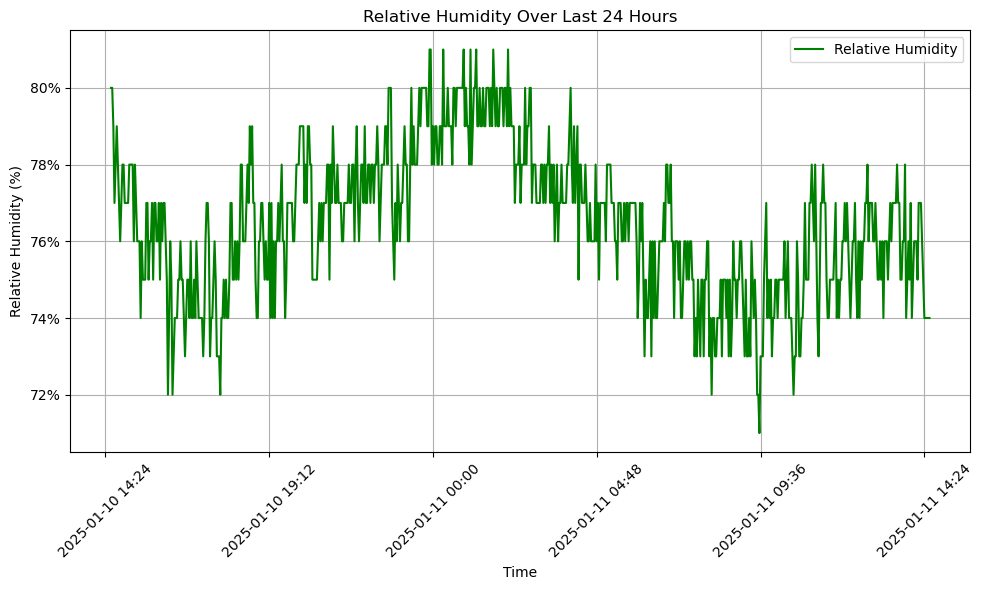

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

relative_humidity_data = pd.read_csv("Datasets_24hrs/Relative Humidity-data-2025-01-11 14_33_09.csv")

relative_humidity_data['Time'] = pd.to_datetime(relative_humidity_data['Time'])

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    relative_humidity_data['Time'],
    relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'],
    label='Relative Humidity',
    color='green'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))

plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


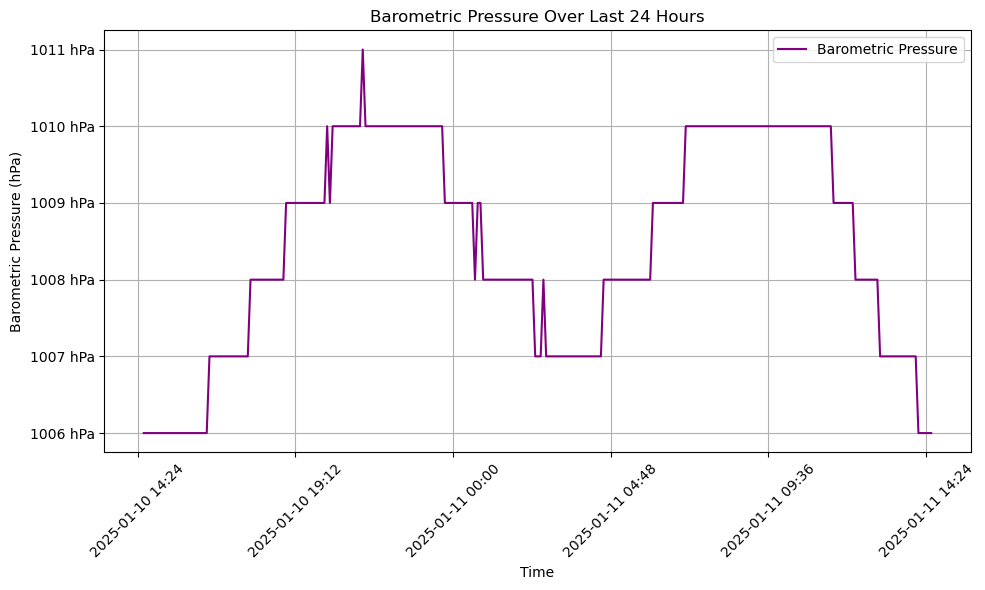

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

barometer_data = pd.read_csv("Datasets_24hrs/Barometer-data-2025-01-11 14_33_17.csv")

barometer_data['Time'] = pd.to_datetime(barometer_data['Time'])

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    barometer_data['Time'],
    barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'],
    label='Barometric Pressure',
    color='purple'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f hPa'))

plt.xlabel('Time')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Examining Data for the last 48 hrs

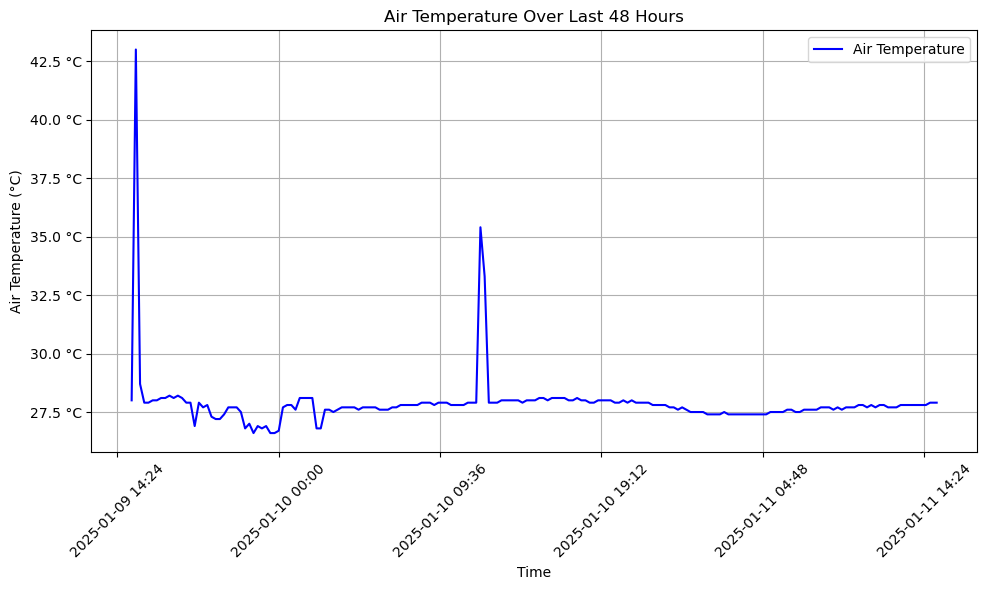

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

air_temperature_data = pd.read_csv("Datasets_48hrs/Air Temperature-data-2025-01-11 15_08_40.csv")

air_temperature_data['Time'] = pd.to_datetime(air_temperature_data['Time'])

air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temperature_data[
    'MwxStbdAirTemp stbd_mast_vaisala'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    air_temperature_data['Time'],
    air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'],
    label='Air Temperature',
    color='blue'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


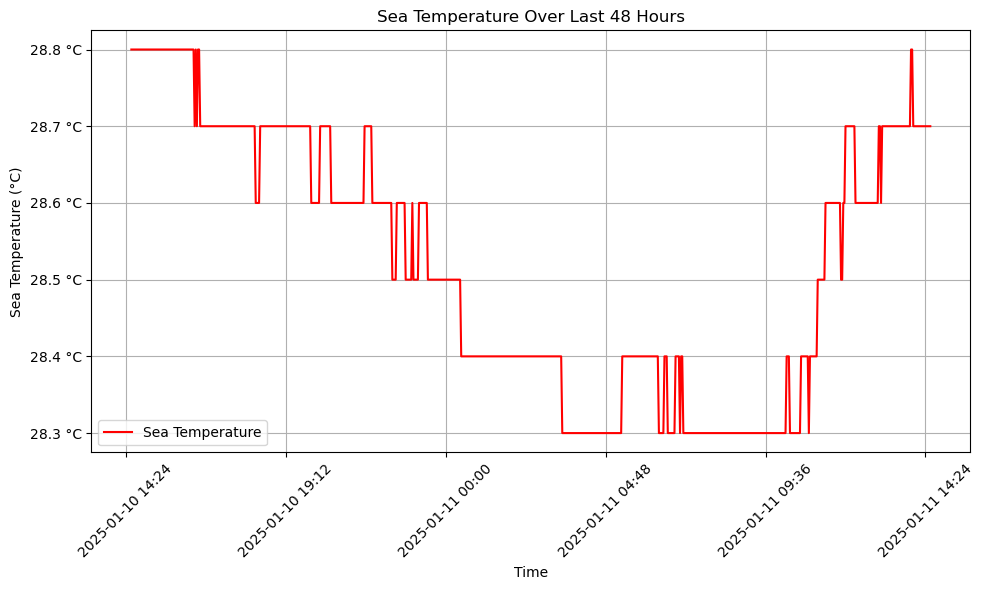

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

sea_temperature_data = pd.read_csv("Datasets_24hrs/Sea Temperature-data-2025-01-11 14_32_52.csv")

sea_temperature_data['Time'] = pd.to_datetime(sea_temperature_data['Time'])

sea_temperature_data['Temp bow_sbe45_tsg'] = sea_temperature_data[
    'Temp bow_sbe45_tsg'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    sea_temperature_data['Time'],
    sea_temperature_data['Temp bow_sbe45_tsg'],
    label='Sea Temperature',
    color='red'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Sea Temperature (°C)')
plt.title('Sea Temperature Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


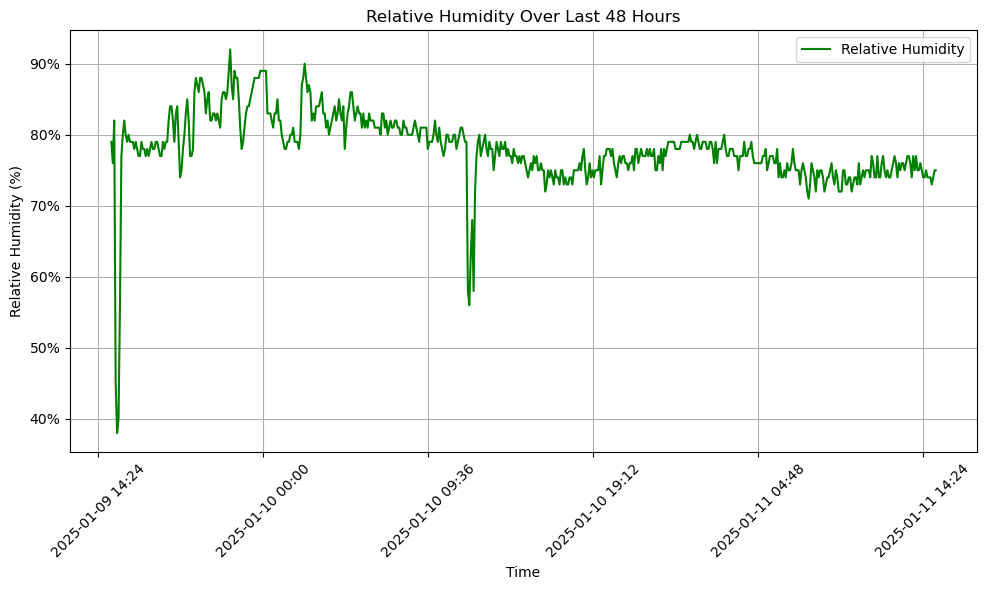

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

relative_humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")

relative_humidity_data['Time'] = pd.to_datetime(relative_humidity_data['Time'])

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    relative_humidity_data['Time'],
    relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'],
    label='Relative Humidity',
    color='green'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))

plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


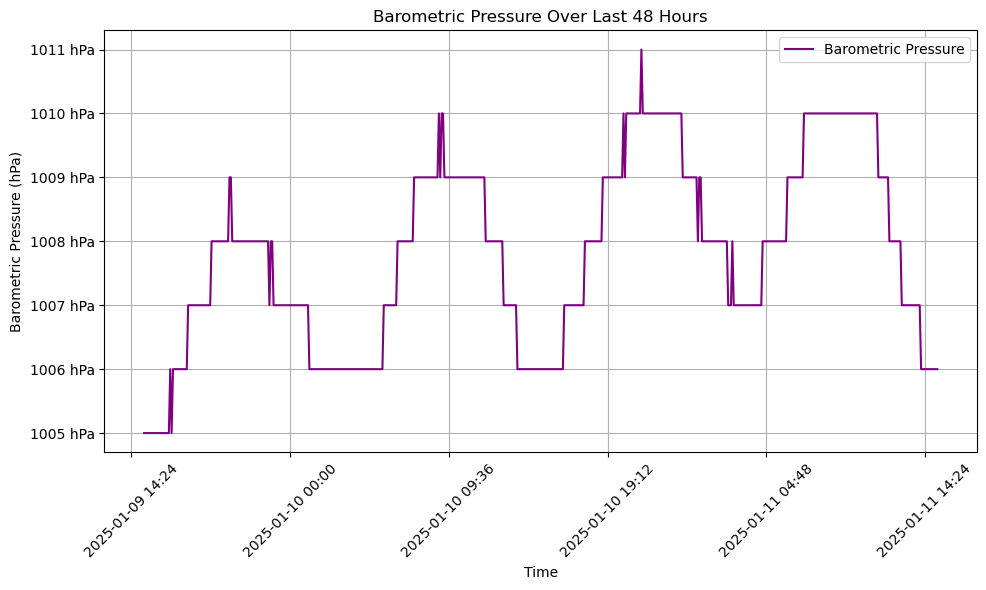

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

barometer_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

barometer_data['Time'] = pd.to_datetime(barometer_data['Time'])

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    barometer_data['Time'],
    barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'],
    label='Barometric Pressure',
    color='purple'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f hPa'))

plt.xlabel('Time')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
